In [ ]:
 ##Application of Analysis for the next color fashion trend 

In [ ]:
!pip install beautifulsoup4
!pip install pillow
!pip install pandas

In [ ]:
# STEP 1 : Extracting data and droping unnecessary things 

In [1]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from collections import Counter
import pandas as pd
import time

# URLs to scrape
urls = [
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/louis-vuitton',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/chanel',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/alexander-mcqueen',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/balenciaga',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/hermes',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/loewe',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/gucci',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/chloe',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/max-mara',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/miu-miu',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/ralph-lauren',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/marc-jacobs',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/valentino',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/schiaparelli',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/bottega-veneta',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/christian-dior',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/dolce-gabbana',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/fendi',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/givenchy',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/carolina-herrera',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/coach',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/giorgio-armani',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/isabel-marant',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/jacquemus',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/jil-sander',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/saint-laurent',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/stella-mccartney',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/tory-burch',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/vivienne-westwood',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/zimmermann',
]

# URLs to company names
url_to_company = {
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/louis-vuitton': 'Louis Vuitton',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/chanel': 'Chanel',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/alexander-mcqueen': 'Alexander McQueen',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/balenciaga': 'Balenciaga',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/hermes': 'Hermes',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/loewe': 'Loewe',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/gucci': 'Gucci',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/chloe': 'Chloe',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/max-mara': 'Max Mara',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/miu-miu': 'Miu Miu',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/ralph-lauren': 'Ralph Lauren',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/marc-jacobs': 'Marc Jacobs',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/valentino': 'Valentino',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/schiaparelli': 'Schiaparelli',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/bottega-veneta': 'Bottega Veneta',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/christian-dior': 'Christian Dior',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/dolce-gabbana': 'Dolce & Gabbana',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/fendi': 'Fendi',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/givenchy': 'Givenchy',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/carolina-herrera': 'Carolina Herrera',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/coach': 'Coach',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/giorgio-armani': 'Giorgio Armani',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/isabel-marant': 'Isabel Marant',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/jacquemus': 'Jacquemus',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/jil-sander': 'Jil Sander',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/saint-laurent': 'Saint Laurent',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/stella-mccartney': 'Stella McCartney',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/tory-burch': 'Tory Burch',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/vivienne-westwood': 'Vivienne Westwood',
    'https://www.vogue.com/fashion-shows/fall-2024-ready-to-wear/zimmermann': 'Zimmermann',
}

def get_image_urls(url, retries=3):
    for _ in range(retries):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            image_urls = [img.get('src') for img in soup.find_all('img') if img.get('src').startswith('http')]
            return image_urls
        except (requests.exceptions.RequestException, requests.exceptions.ConnectionError) as e:
            print(f"Error processing URL {url}: {e}")
            time.sleep(5) 
    return []

def get_dominant_color(image_url, retries=3):
    for _ in range(retries):
        try:
            response = requests.get(image_url, timeout=10)
            response.raise_for_status()
            img = Image.open(BytesIO(response.content))
            img = img.resize((100, 100))  
            pixels = img.getcolors(10000)  
            most_common_color = Counter([color for count, color in pixels]).most_common(1)[0][0]
            return most_common_color
        except (requests.exceptions.RequestException, requests.exceptions.ConnectionError) as e:
            print(f"Error processing image {image_url}: {e}")
            time.sleep(5)  
    return None

def classify_color(rgb_tuple):
    r, g, b = rgb_tuple
    if (r + g + b) / 3 > 200:
        return "Light Color"
    elif (r + g + b) / 3 < 85:
        return "Dark Color"
    elif r > 150 and g > 100 and b < 100:
        return "Brown/Beige Color"
    else:
        return "Other"

# Collecting data from all URLs
image_data = []
for url in urls:
    company = url_to_company[url]
    image_urls = get_image_urls(url)
    for img_url in image_urls:
        color = get_dominant_color(img_url)
        if color:
            color_class = classify_color(color)
            image_data.append({'Company': company, 'Image URL': img_url, 'Dominant Color': color, 'Color Class': color_class})

# Create a DataFrame
df = pd.DataFrame(image_data)

# Define the URLs and Colors to drop these 
urls_colors_to_drop = [
    ("https://assets.vogue.com/photos/66700d39a6740f014819a8fe/master/w_1280%2Cc_limit/00001-maccapani-fall-2024-ready-to-wear-credit-brand.jpg", "(81, 0, 0)"),
    ("https://assets.vogue.com/photos/668399b27589ef6550c548bc/master/w_1280%2Cc_limit/00001-marc-jacobs-fall-2024-ready-to-wear-credit-brand.jpg", "(165, 137, 110)"),
    ("https://assets.vogue.com/photos/66706c18492e4258344d82d0/master/w_1280%2Cc_limit/00001-max-mara-atelier-fall-2024-ready-to-wear-credit-brand.jpg", "(146, 137, 126)"),
    ("https://assets.vogue.com/photos/666707dfa8354f0b8456d212/master/w_1280%2Cc_limit/00001-jacquemus-fall-24-ready-to-wear-credit-gorunway.jpg", "(235, 187, 159)"),
    ("https://assets.vogue.com/photos/66620ebad4d02e06c35d42d6/master/w_1280%2Cc_limit/00001-the-attico-fall-24-ready-to-wear-credit-brand.jpg", "(255, 255, 255)"),
    ("https://assets.vogue.com/photos/6661d9e1e4482f3886e34755/master/w_1280%2Cc_limit/00001-alexander-wang-fall-2024-ready-to-wear-credit-brand.jpg", "(253, 255, 255)"),
    ("https://assets.vogue.com/photos/6683216d4cc2fd8bfaf426af/1:1/w_90%2Cc_limit/undefined", "(255, 255, 255)"),
    ("https://assets.vogue.com/photos/650a706e01b2893de54d1023/1:1/w_90%2Cc_limit/undefined","(3, 0, 0)")
]

# Ensure the 'Dominant Color' is in the correct format 
df['Dominant Color'] = df['Dominant Color'].astype(str)

# Filter the DataFrame
df_filtered = df[~df.apply(lambda row: (row['Image URL'], row['Dominant Color']) in urls_colors_to_drop, axis=1)]

# Save the filtered DataFrame back to a CSV file
df_filtered.to_csv('fashion_show_colors_filtered.csv', index=False)

# Print the DataFrame to verify
print(df_filtered)


           Company                                          Image URL  \
1    Louis Vuitton  https://assets.vogue.com/photos/65e782f4e62118...   
2    Louis Vuitton  https://assets.vogue.com/photos/65e782f659e1b4...   
3    Louis Vuitton  https://assets.vogue.com/photos/65e782fadbe716...   
4    Louis Vuitton  https://assets.vogue.com/photos/65e782f98c5ec4...   
5    Louis Vuitton  https://assets.vogue.com/photos/65e782fbe62118...   
..             ...                                                ...   
848     Zimmermann  https://assets.vogue.com/photos/65e5db0012b887...   
849     Zimmermann  https://assets.vogue.com/photos/65e5db022ada30...   
850     Zimmermann  https://assets.vogue.com/photos/65e5db0531cbe9...   
851     Zimmermann  https://assets.vogue.com/photos/65e5db05bc3878...   
852     Zimmermann  https://assets.vogue.com/photos/66a2640c36b075...   

      Dominant Color  Color Class  
1    (255, 255, 255)  Light Color  
2    (255, 255, 255)  Light Color  
3    (255, 255,

In [2]:
# Step 2: Explore Data 

In [3]:
df

,Company,Image URL,Dominant Color,Color Class
0,Louis Vuitton,https://assets.vogue.com/photos/650a706e01b289...,"(3, 0, 0)",Dark Color
1,Louis Vuitton,https://assets.vogue.com/photos/65e782f4e62118...,"(255, 255, 255)",Light Color
2,Louis Vuitton,https://assets.vogue.com/photos/65e782f659e1b4...,"(255, 255, 255)",Light Color
3,Louis Vuitton,https://assets.vogue.com/photos/65e782fadbe716...,"(255, 255, 254)",Light Color
4,Louis Vuitton,https://assets.vogue.com/photos/65e782f98c5ec4...,"(255, 255, 255)",Light Color
...,...,...,...,...
853,Zimmermann,https://assets.vogue.com/photos/66700d39a6740f...,"(81, 0, 0)",Dark Color
854,Zimmermann,https://assets.vogue.com/photos/668399b27589ef...,"(165, 137, 110)",Other
855,Zimmermann,https://assets.vogue.com/photos/66706c18492e42...,"(146, 137, 126)",Other
856,Zimmermann,https://assets.vogue.com/photos/666707dfa8354f...,"(235, 187, 159)",Other


In [4]:
df['Dominant Color']

0            (3, 0, 0)
1      (255, 255, 255)
2      (255, 255, 255)
3      (255, 255, 254)
4      (255, 255, 255)
            ...       
853         (81, 0, 0)
854    (165, 137, 110)
855    (146, 137, 126)
856    (235, 187, 159)
857    (255, 255, 255)
Name: Dominant Color, Length: 858, dtype: object

In [5]:
df.dtypes

Company           object
Image URL         object
Dominant Color    object
Color Class       object
dtype: object

In [6]:
df.columns

Index(['Company', 'Image URL', 'Dominant Color', 'Color Class'], dtype='object')

In [7]:
df.shape

(858, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         858 non-null    object
 1   Image URL       858 non-null    object
 2   Dominant Color  858 non-null    object
 3   Color Class     858 non-null    object
dtypes: object(4)
memory usage: 26.9+ KB


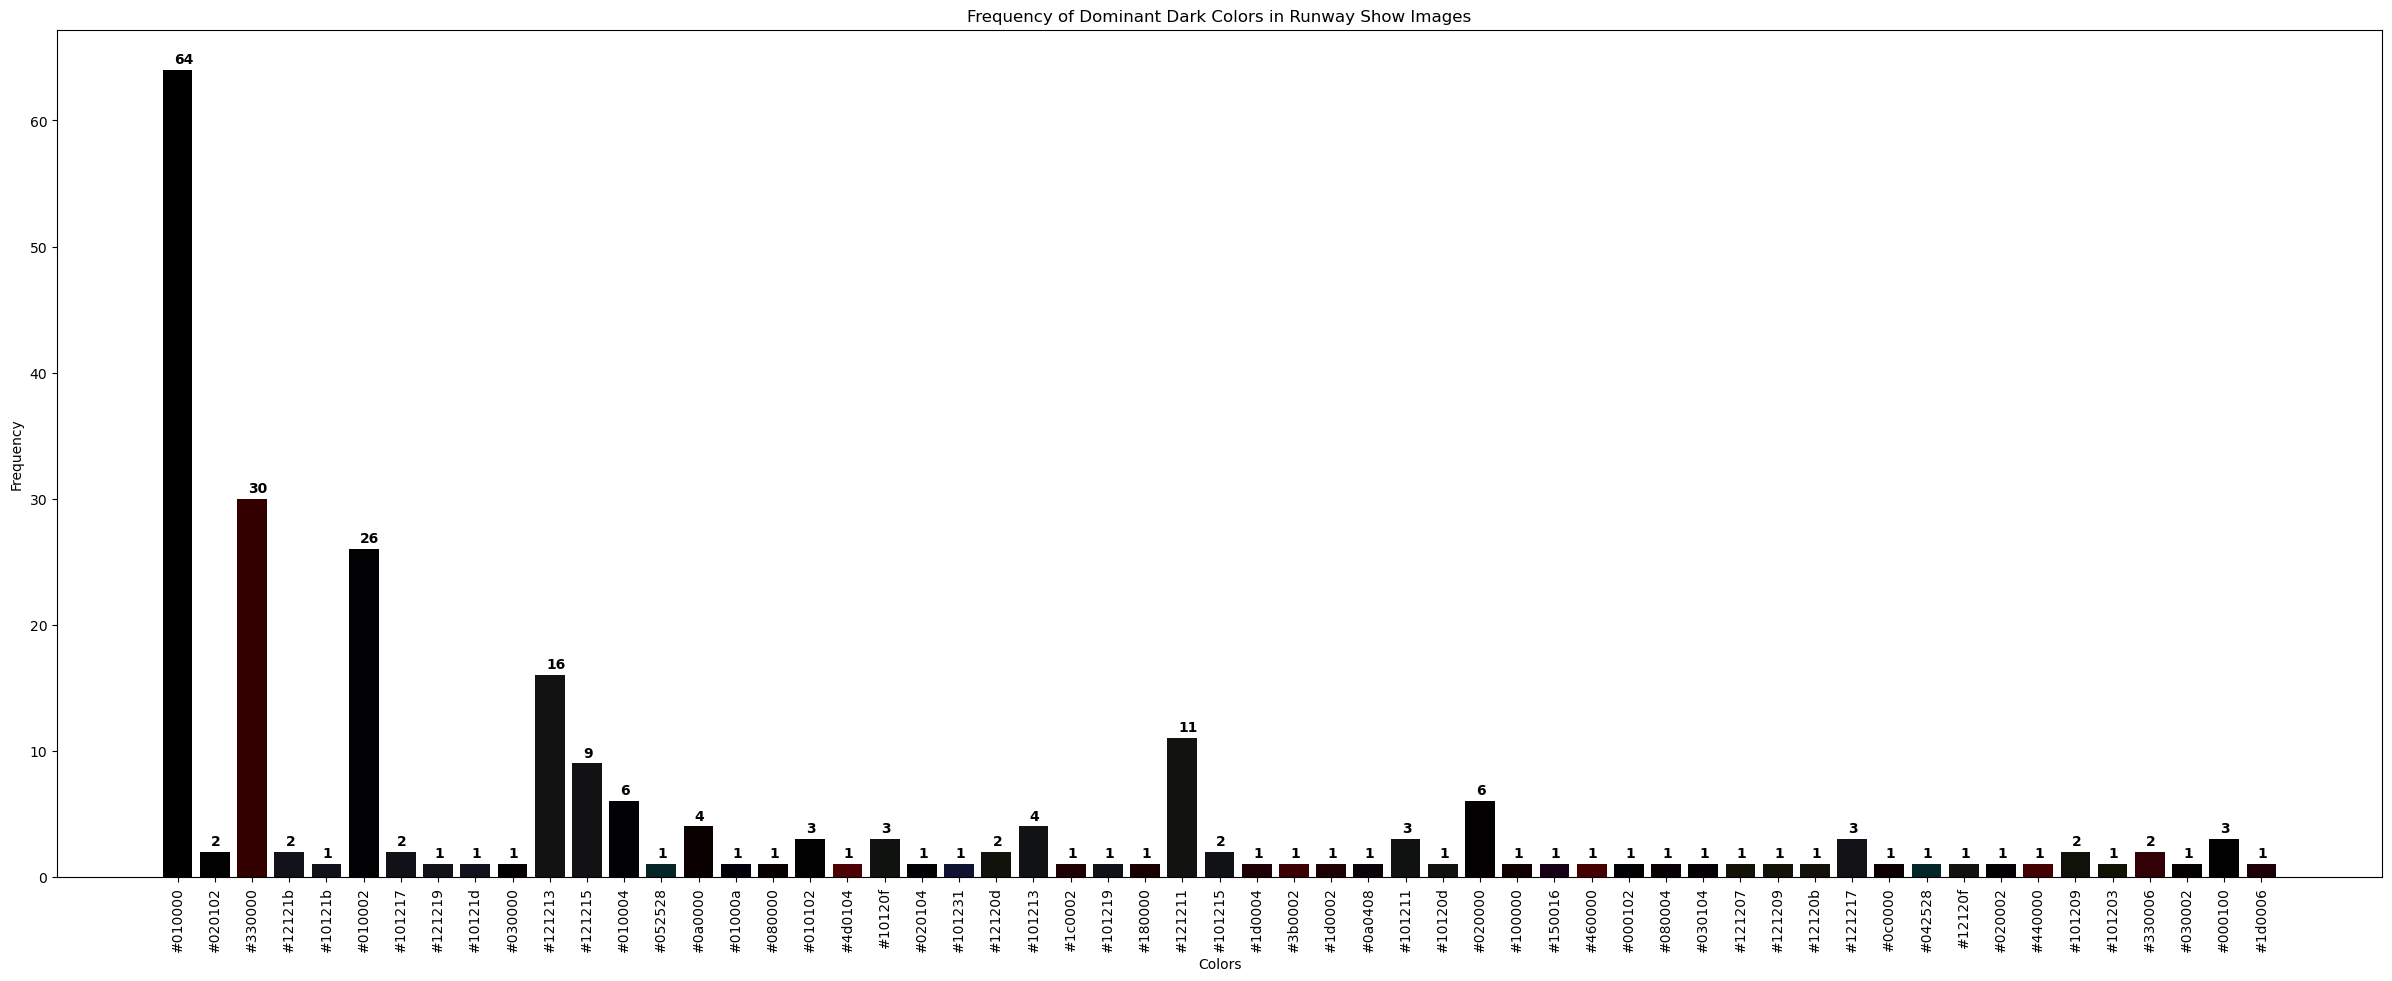

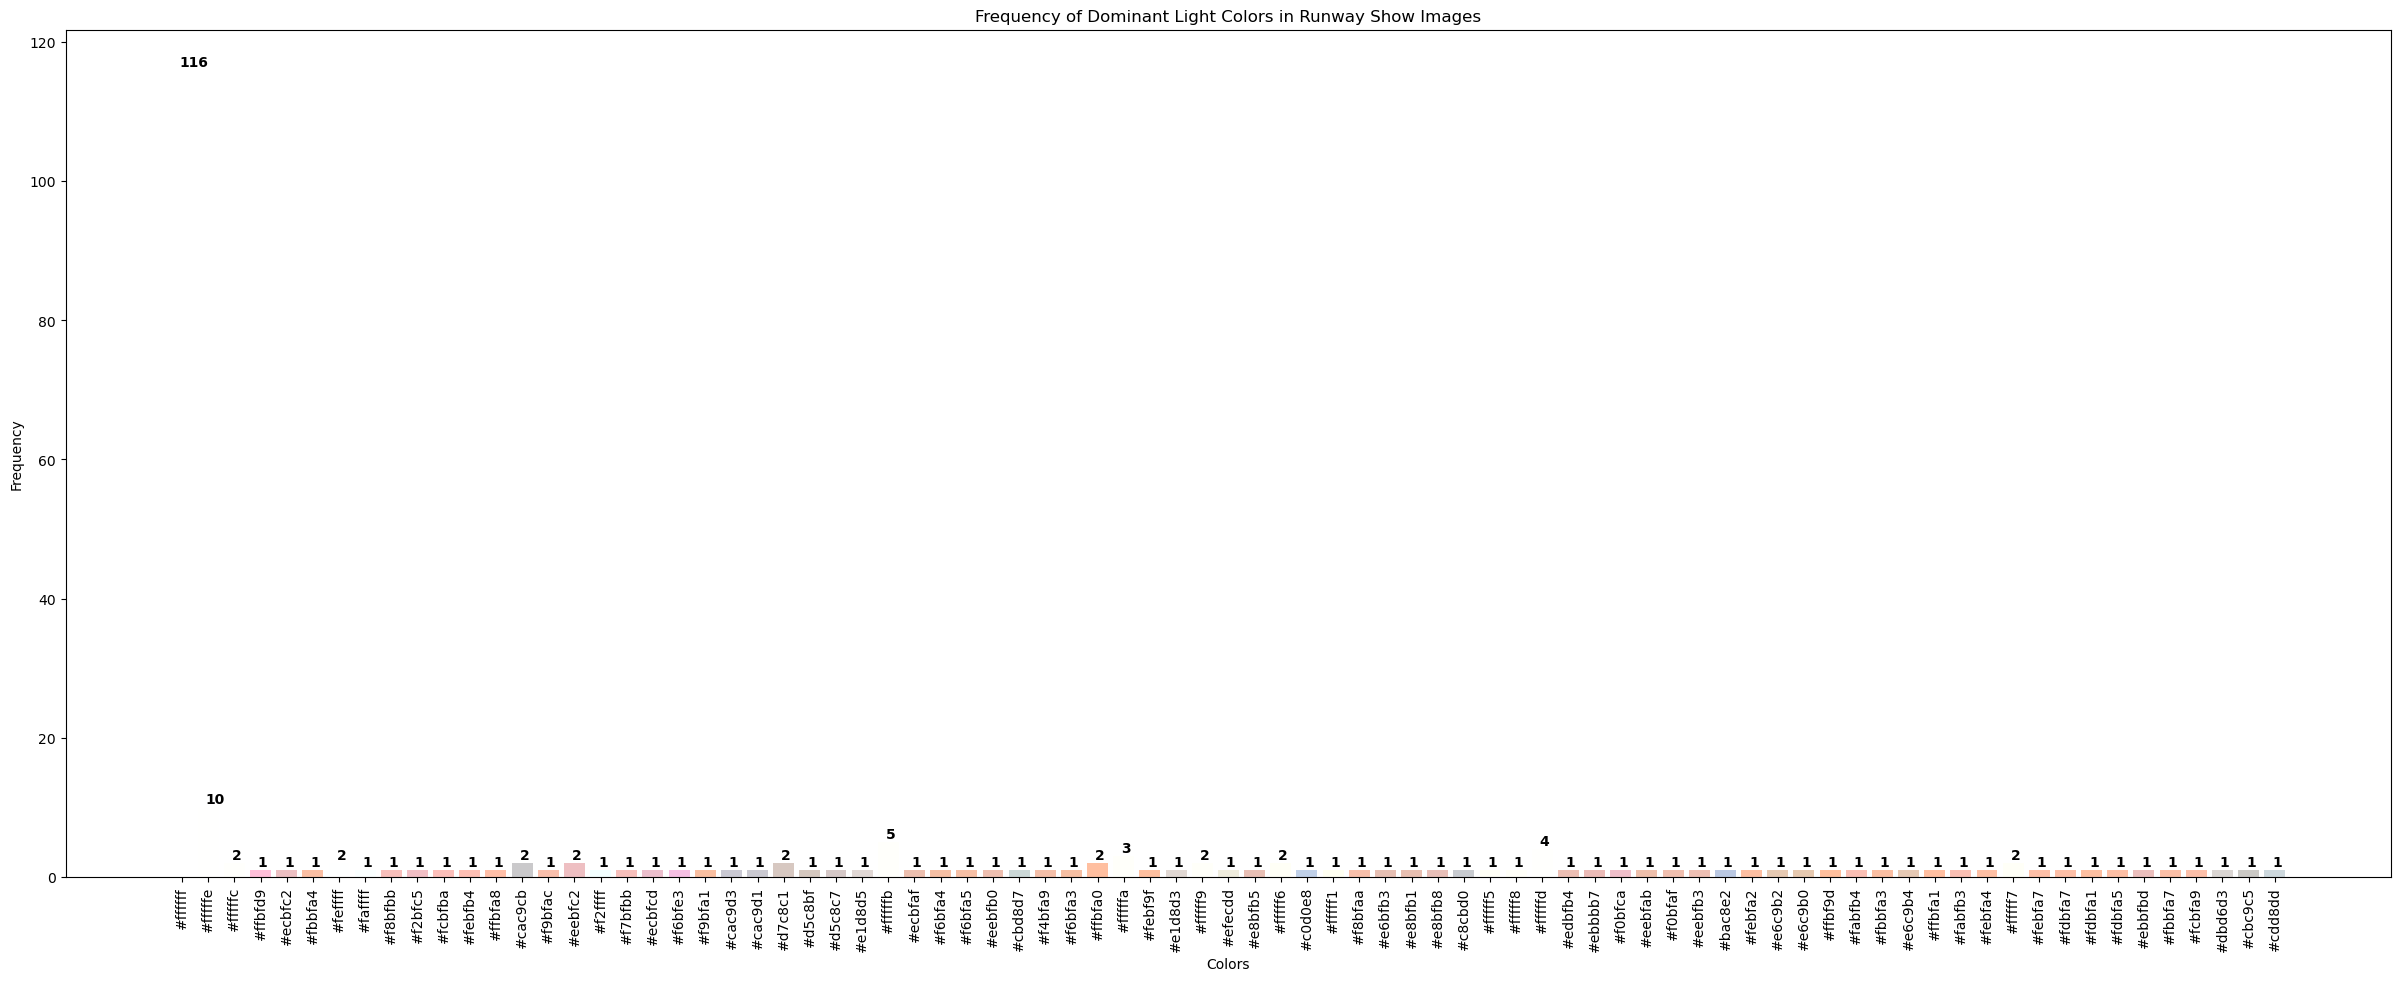

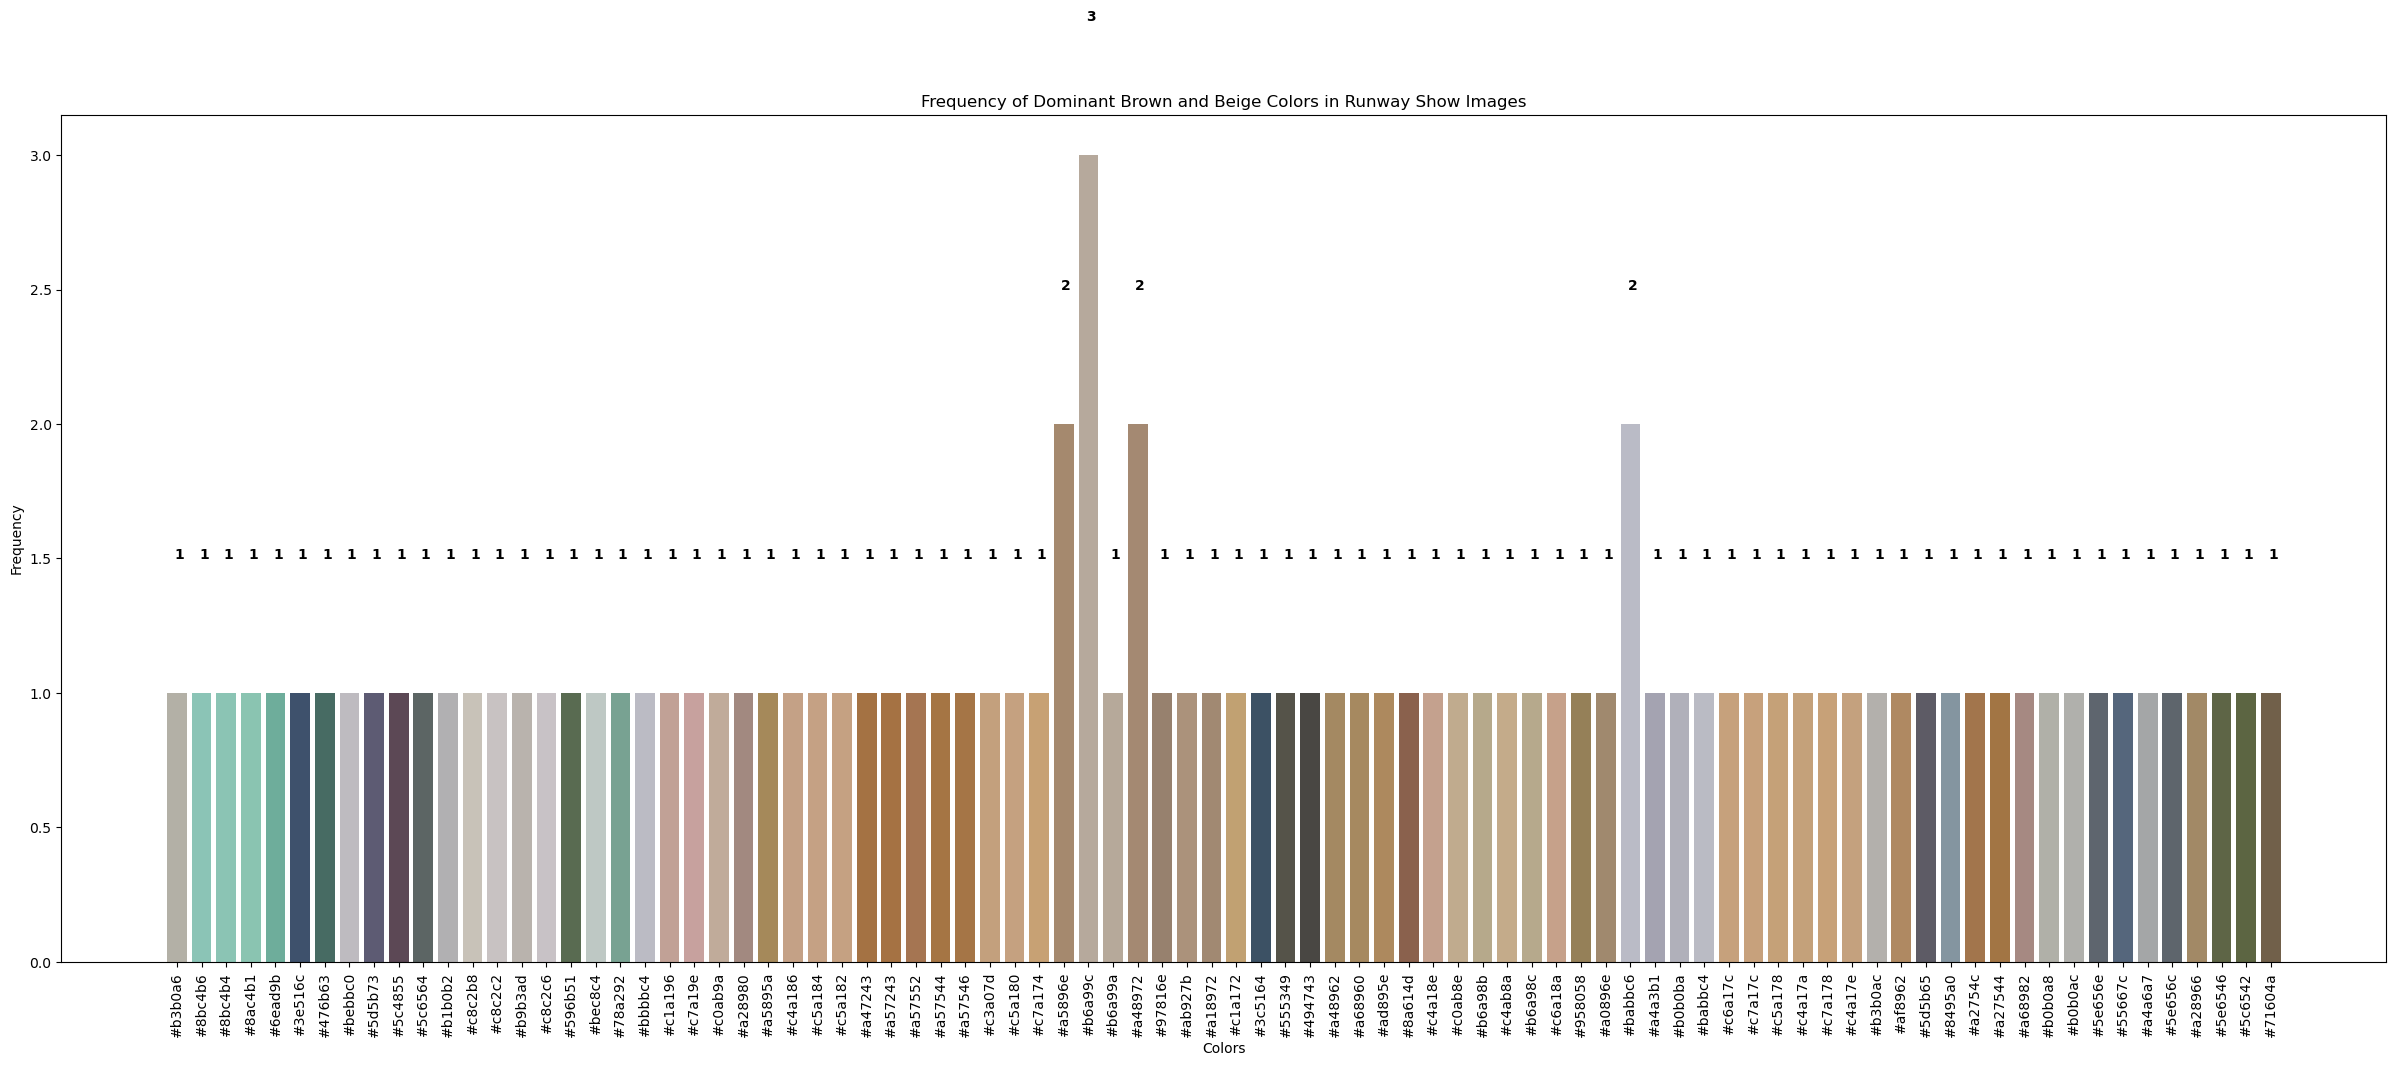

Dark Colors RGB Values: {(1, 0, 0): 64, (2, 1, 2): 2, (51, 0, 0): 30, (18, 18, 27): 2, (16, 18, 27): 1, (1, 0, 2): 26, (16, 18, 23): 2, (18, 18, 25): 1, (16, 18, 29): 1, (3, 0, 0): 1, (18, 18, 19): 16, (18, 18, 21): 9, (1, 0, 4): 6, (5, 37, 40): 1, (10, 0, 0): 4, (1, 0, 10): 1, (8, 0, 0): 1, (1, 1, 2): 3, (77, 1, 4): 1, (16, 18, 15): 3, (2, 1, 4): 1, (16, 18, 49): 1, (18, 18, 13): 2, (16, 18, 19): 4, (28, 0, 2): 1, (16, 18, 25): 1, (24, 0, 0): 1, (18, 18, 17): 11, (16, 18, 21): 2, (29, 0, 4): 1, (59, 0, 2): 1, (29, 0, 2): 1, (10, 4, 8): 1, (16, 18, 17): 3, (16, 18, 13): 1, (2, 0, 0): 6, (16, 0, 0): 1, (21, 0, 22): 1, (70, 0, 0): 1, (0, 1, 2): 1, (8, 0, 4): 1, (3, 1, 4): 1, (18, 18, 7): 1, (18, 18, 9): 1, (18, 18, 11): 1, (18, 18, 23): 3, (12, 0, 0): 1, (4, 37, 40): 1, (18, 18, 15): 1, (2, 0, 2): 1, (68, 0, 0): 1, (16, 18, 9): 2, (16, 18, 3): 1, (51, 0, 6): 2, (3, 0, 2): 1, (0, 1, 0): 3, (29, 0, 6): 1}
Light Colors RGB Values: {(255, 255, 255): 116, (255, 255, 254): 10, (255, 255, 252):

In [17]:
# Visualize the most Dominant Colors in Groups

import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


df_filtered = pd.read_csv('fashion_show_colors_filtered.csv')


def convert_to_rgb_tuple(color):
    if isinstance(color, str):
        return tuple(map(int, color.strip('()').split(',')))
    return color

dominant_colors = [convert_to_rgb_tuple(color) for color in df_filtered['Dominant Color']]


color_counts = Counter(dominant_colors)

# Convert RGB tuples to hexadecimal color codes for plotting
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb


dark_threshold = 100  # Sum of RGB values <= 100 is considered dark
light_threshold = 600  # Sum of RGB values >= 600 is considered light
brown_thresholds = (60, 200)  # Red, green, blue values between 60 and 200 are considered brown/beige

# Classify colors
dark_colors = {}
light_colors = {}
brown_beige_colors = {}

for color, count in color_counts.items():
    if sum(color) <= dark_threshold:
        dark_colors[color] = count
    elif sum(color) >= light_threshold:
        light_colors[color] = count
    elif all(brown_thresholds[0] <= value <= brown_thresholds[1] for value in color):
        brown_beige_colors[color] = count

# Function to plot colors
def plot_colors(color_dict, title, filename):
    colors = list(color_dict.keys())
    counts = list(color_dict.values())
    hex_colors = [rgb_to_hex(color) for color in colors]
    
    plt.figure(figsize=(30, 11))
    bars = plt.bar(hex_colors, counts, color=hex_colors)
    plt.xlabel('Colors')
    plt.ylabel('Frequency')
    plt.title(title)
    
    
    
    plt.xticks(rotation=90)

    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.5, int(yval), color='black', fontweight='bold')

    
    plt.savefig(filename, format='jpg')
    plt.show()

# Plotting the color categories
plot_colors(dark_colors, 'Frequency of Dominant Dark Colors in Runway Show Images', 'Frequency_of_Dominant_Dark_Colors.jpg')
plot_colors(light_colors, 'Frequency of Dominant Light Colors in Runway Show Images', 'Frequency_of_Dominant_Light_Colors.jpg')
plot_colors(brown_beige_colors, 'Frequency of Dominant Brown and Beige Colors in Runway Show Images', 'Frequency_of_Dominant_Brown_and_Beige_Colors.jpg')

# Display RGB values for verification
print("Dark Colors RGB Values:", dark_colors)
print("Light Colors RGB Values:", light_colors)
print("Brown and Beige Colors RGB Values:", brown_beige_colors)


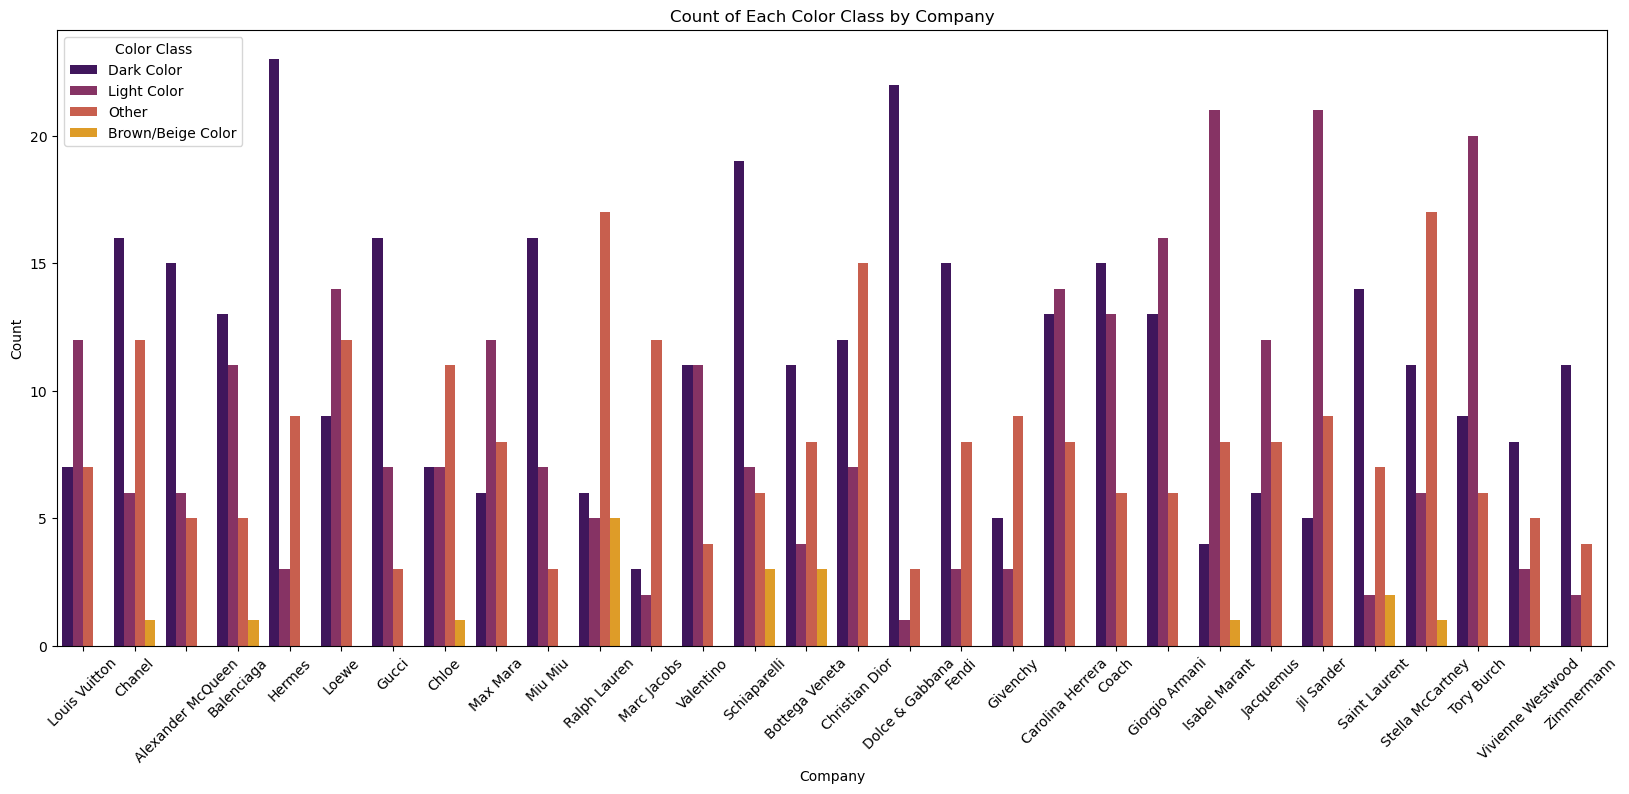

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation of the color classes using seaborn and matplotlib
plt.figure(figsize=(20, 8))
sns.countplot(x='Company', hue='Color Class', data=df, palette='inferno')
plt.title('Count of Each Color Class by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('Count_of_each_color_class_by_company.jpg')
plt.show()


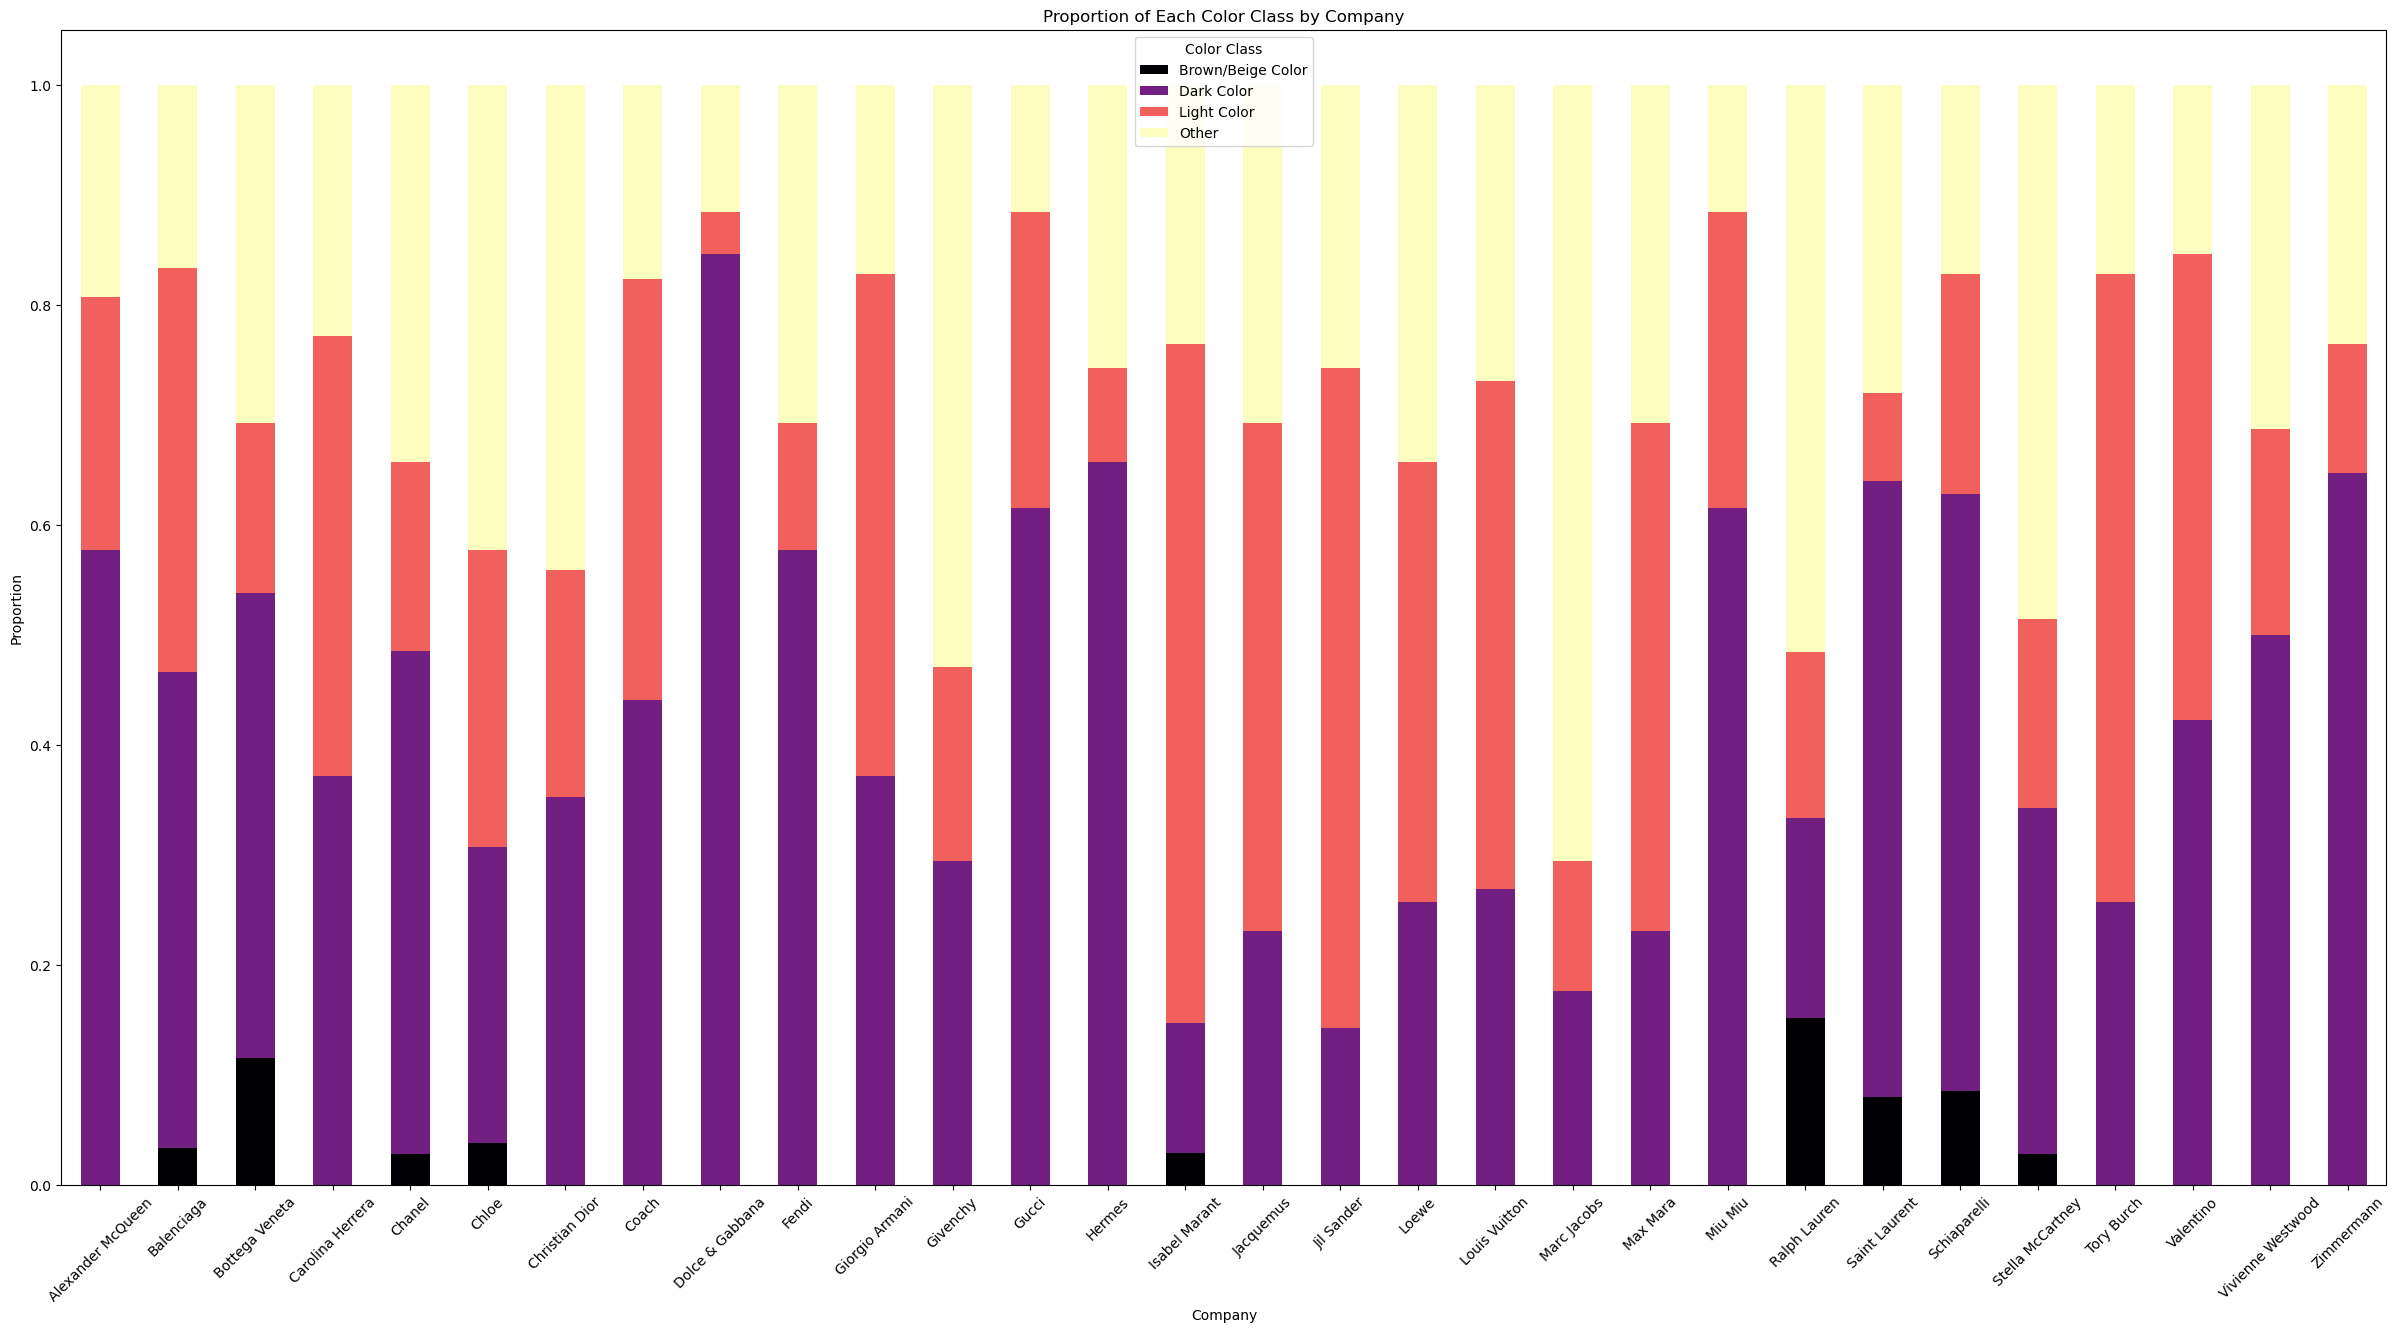

In [23]:
# Calculate the amount of each color class per company
color_class_counts = df.groupby(['Company', 'Color Class']).size().unstack(fill_value=0)
color_class_proportions = color_class_counts.div(color_class_counts.sum(axis=1), axis=0)


color_class_proportions.plot(kind='bar', stacked=True, figsize=(30,15), colormap='magma')
plt.title('Proportion of Each Color Class by Company')
plt.xlabel('Company')
plt.ylabel('Proportion')
plt.legend(title='Color Class')
plt.xticks(rotation=45)
plt.savefig('Proportion_of_Each_Color_Class_by_Company.jpg')
plt.show()



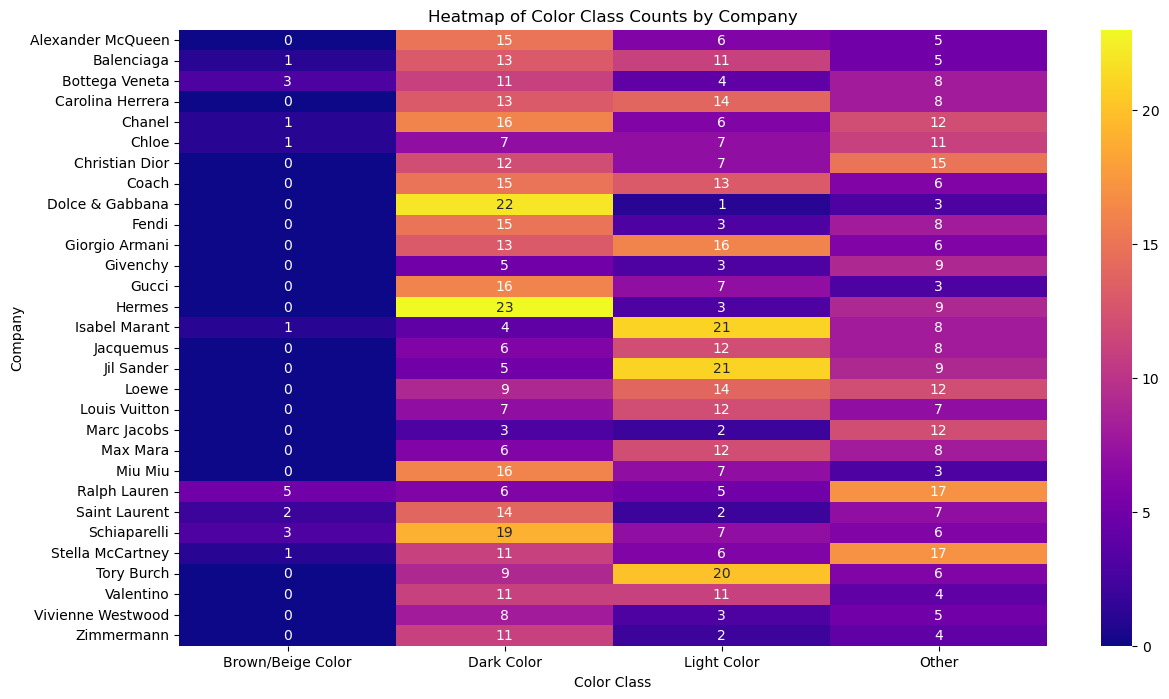

In [22]:
plt.figure(figsize=(14, 8))
sns.heatmap(color_class_counts, annot=True, cmap='plasma', fmt='d')
plt.title('Heatmap of Color Class Counts by Company')
plt.xlabel('Color Class')
plt.ylabel('Company')
plt.savefig('Heatmap_of_color_class_counts_by_company.jpg')
plt.show()

In [15]:
 df['Dominant Color'].value_counts()

(255, 255, 255)    155
(1, 0, 0)           64
(165, 137, 110)     31
(146, 137, 126)     30
(235, 187, 159)     30
                  ... 
(16, 0, 0)           1
(50, 58, 73)         1
(207, 191, 185)      1
(238, 191, 176)      1
(29, 0, 6)           1
Name: Dominant Color, Length: 357, dtype: int64

In [16]:
df['Color Class'].value_counts()

Dark Color           341
Light Color          258
Other                241
Brown/Beige Color     18
Name: Color Class, dtype: int64

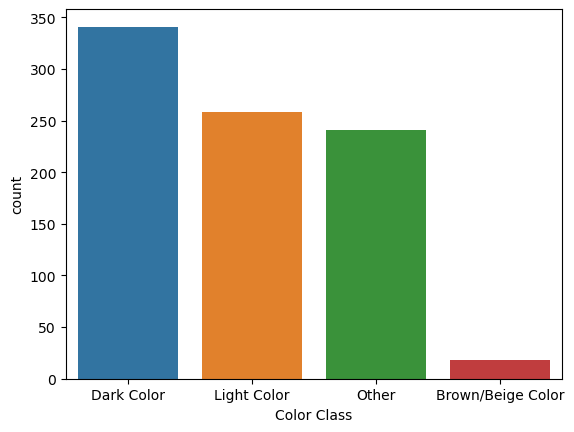

In [21]:
sns.countplot(data=df,x='Color Class')
plt.savefig('countplot.jpg')

In [18]:
other_color = df['Color Class'] == 'Other'
other_color.sum()

241

In [19]:
light_color = df['Color Class'] == 'Light Color'
light_color.sum()

258

In [20]:
dark_color = df['Color Class'] == 'Dark Color'
dark_color.sum()

341

In [21]:
Brown_Beige_color = df['Color Class'] == 'Brown/Beige Color'
Brown_Beige_color.sum()

18

In [27]:
#STEP 3:  Feature Selection

In [32]:
import pandas as pd
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [33]:
# Load the filtered dataset
df_filtered = pd.read_csv('fashion_show_colors_filtered.csv')


In [34]:
# Extract RGB values from Dominant Color and create separate columns
df_filtered['R'] = df_filtered['Dominant Color'].apply(lambda x: ast.literal_eval(x)[0])
df_filtered['G'] = df_filtered['Dominant Color'].apply(lambda x: ast.literal_eval(x)[1])
df_filtered['B'] = df_filtered['Dominant Color'].apply(lambda x: ast.literal_eval(x)[2])


In [35]:
# Normalize the RGB values
scaler = StandardScaler()
df_filtered[['R_normalized', 'G_normalized', 'B_normalized']] = scaler.fit_transform(df_filtered[['R', 'G', 'B']])

In [36]:
# STEP 4: PREPARE FOR CLUSTERING

In [37]:
# FIRST DETERMINE HOW MANY CLUSTERS USING THE ELBOW METHOD 

In [38]:
# Prepare the feature matrix for clustering
X = df_filtered[['R_normalized', 'G_normalized', 'B_normalized']]

In [39]:
# Use the Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Print lengths of K and inertia to check if they match
print(f"Length of K: {len(K)}")
print(f"Length of inertia: {len(inertia)}")


print("Inertia values:", inertia)


C:\Users\loren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\loren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Length of K: 10
Length of inertia: 10
Inertia values: [2064.0, 312.15002889944225, 151.79978088581868, 95.28825523524968, 66.66174986063113, 56.663949182564295, 49.258359844550455, 42.948406555514424, 36.96512006754655, 31.62811760815576]


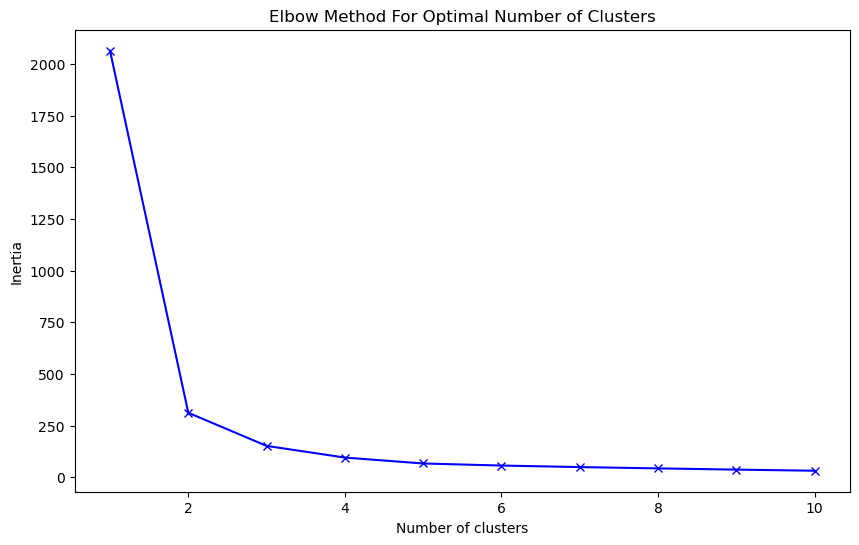

In [40]:
# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.savefig('ElbowMethodforOptimalNumberofClusters.jpg')
plt.show()


In [41]:
# Apply K-means with the chosen number of clusters (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X)


C:\Users\loren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\loren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [43]:
# Analyze clusters
centroids = kmeans.cluster_centers_
print("Cluster centroids (normalized):", centroids)


Cluster centroids (normalized): [[ 0.69080734  0.50401471  0.37019529]
 [ 1.06119281  1.28028494  1.38171076]
 [-1.04710791 -1.03013431 -0.98876532]]


In [44]:
# convert centroids back to original scale
original_centroids = scaler.inverse_transform(centroids)
print("Cluster centroids (original scale):", original_centroids)


Cluster centroids (original scale): [[214.00458716 173.43577982 151.67889908]
 [253.11111111 252.58641975 252.14197531]
 [ 30.50974026  17.00974026  16.70779221]]


In [45]:
df_filtered.head()

,Company,Image URL,Dominant Color,Color Class,R,G,B,R_normalized,G_normalized,B_normalized,Cluster
0,Louis Vuitton,https://assets.vogue.com/photos/65e782f4e62118...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,1
1,Louis Vuitton,https://assets.vogue.com/photos/65e782f659e1b4...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,1
2,Louis Vuitton,https://assets.vogue.com/photos/65e782fadbe716...,"(255, 255, 254)",Light Color,255,255,254,1.079083,1.303956,1.400418,1
3,Louis Vuitton,https://assets.vogue.com/photos/65e782f98c5ec4...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,1
4,Louis Vuitton,https://assets.vogue.com/photos/65e782fbe62118...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,1


In [64]:
# Print cluster centroids for reference
print("Cluster centroids (normalized):", centroids)
print("Cluster centroids (original scale):", original_centroids)

Cluster centroids (normalized): [[ 0.69080734  0.50401471  0.37019529]
 [ 1.06119281  1.28028494  1.38171076]
 [-1.04710791 -1.03013431 -0.98876532]]
Cluster centroids (original scale): [[214.00458716 173.43577982 151.67889908]
 [253.11111111 252.58641975 252.14197531]
 [ 30.50974026  17.00974026  16.70779221]]


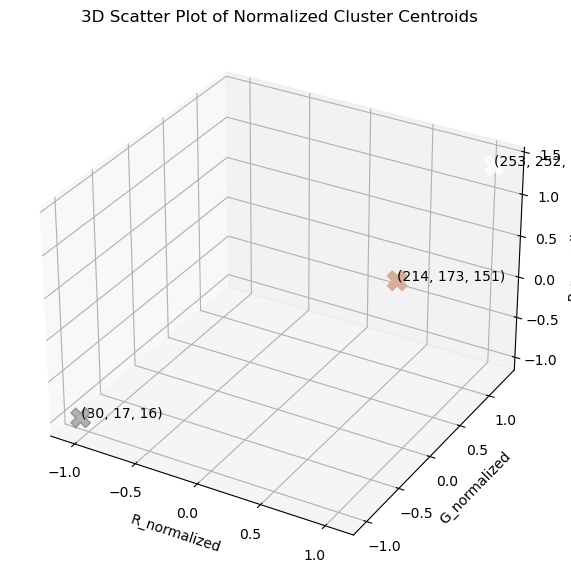

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the cluster centroids (normalized)
normalized_centroids = np.array([
    [ 0.69080734,  0.50401471,  0.37019529],
    [ 1.06119281,  1.28028494,  1.38171076],
    [-1.04710791, -1.03013431, -0.98876532]
])

# Define the cluster centroids (original scale)
original_centroids = np.array([
    [214.00458716, 173.43577982, 151.67889908],
    [253.11111111, 252.58641975, 252.14197531],
    [ 30.50974026,  17.00974026,  16.70779221]
])

# Normalize the original RGB values to [0, 1] for Matplotlib
normalized_colors = original_centroids / 255


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the normalized centroids with actual RGB colors
ax.scatter(normalized_centroids[:, 0], normalized_centroids[:, 1], normalized_centroids[:, 2], 
           c=normalized_colors, s=200, marker='X')

# Annotate the centroids with their original RGB values
for i, centroid in enumerate(original_centroids):
    label = f"({int(centroid[0])}, {int(centroid[1])}, {int(centroid[2])})"
    ax.text(normalized_centroids[i, 0], normalized_centroids[i, 1], normalized_centroids[i, 2], 
            label, color='black')


ax.set_xlabel('R_normalized')
ax.set_ylabel('G_normalized')
ax.set_zlabel('B_normalized')
ax.set_title('3D Scatter Plot of Normalized Cluster Centroids')

plt.savefig('3D_Scatter_Plot_of_Normalized_cluster_centroids.jpg')
plt.show()


In [66]:
# Hierarchical clustering 

In [67]:
# LOAD AND PREPROCESS DATA 
import pandas as pd
import ast
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the filtered dataset
df_filtered = pd.read_csv('fashion_show_colors_filtered.csv')

# Extract RGB values from 'Dominant Color' and create separate columns
df_filtered['R'] = df_filtered['Dominant Color'].apply(lambda x: ast.literal_eval(x)[0])
df_filtered['G'] = df_filtered['Dominant Color'].apply(lambda x: ast.literal_eval(x)[1])
df_filtered['B'] = df_filtered['Dominant Color'].apply(lambda x: ast.literal_eval(x)[2])

# Normalize the RGB values
scaler = StandardScaler()
df_filtered[['R_normalized', 'G_normalized', 'B_normalized']] = scaler.fit_transform(df_filtered[['R', 'G', 'B']])


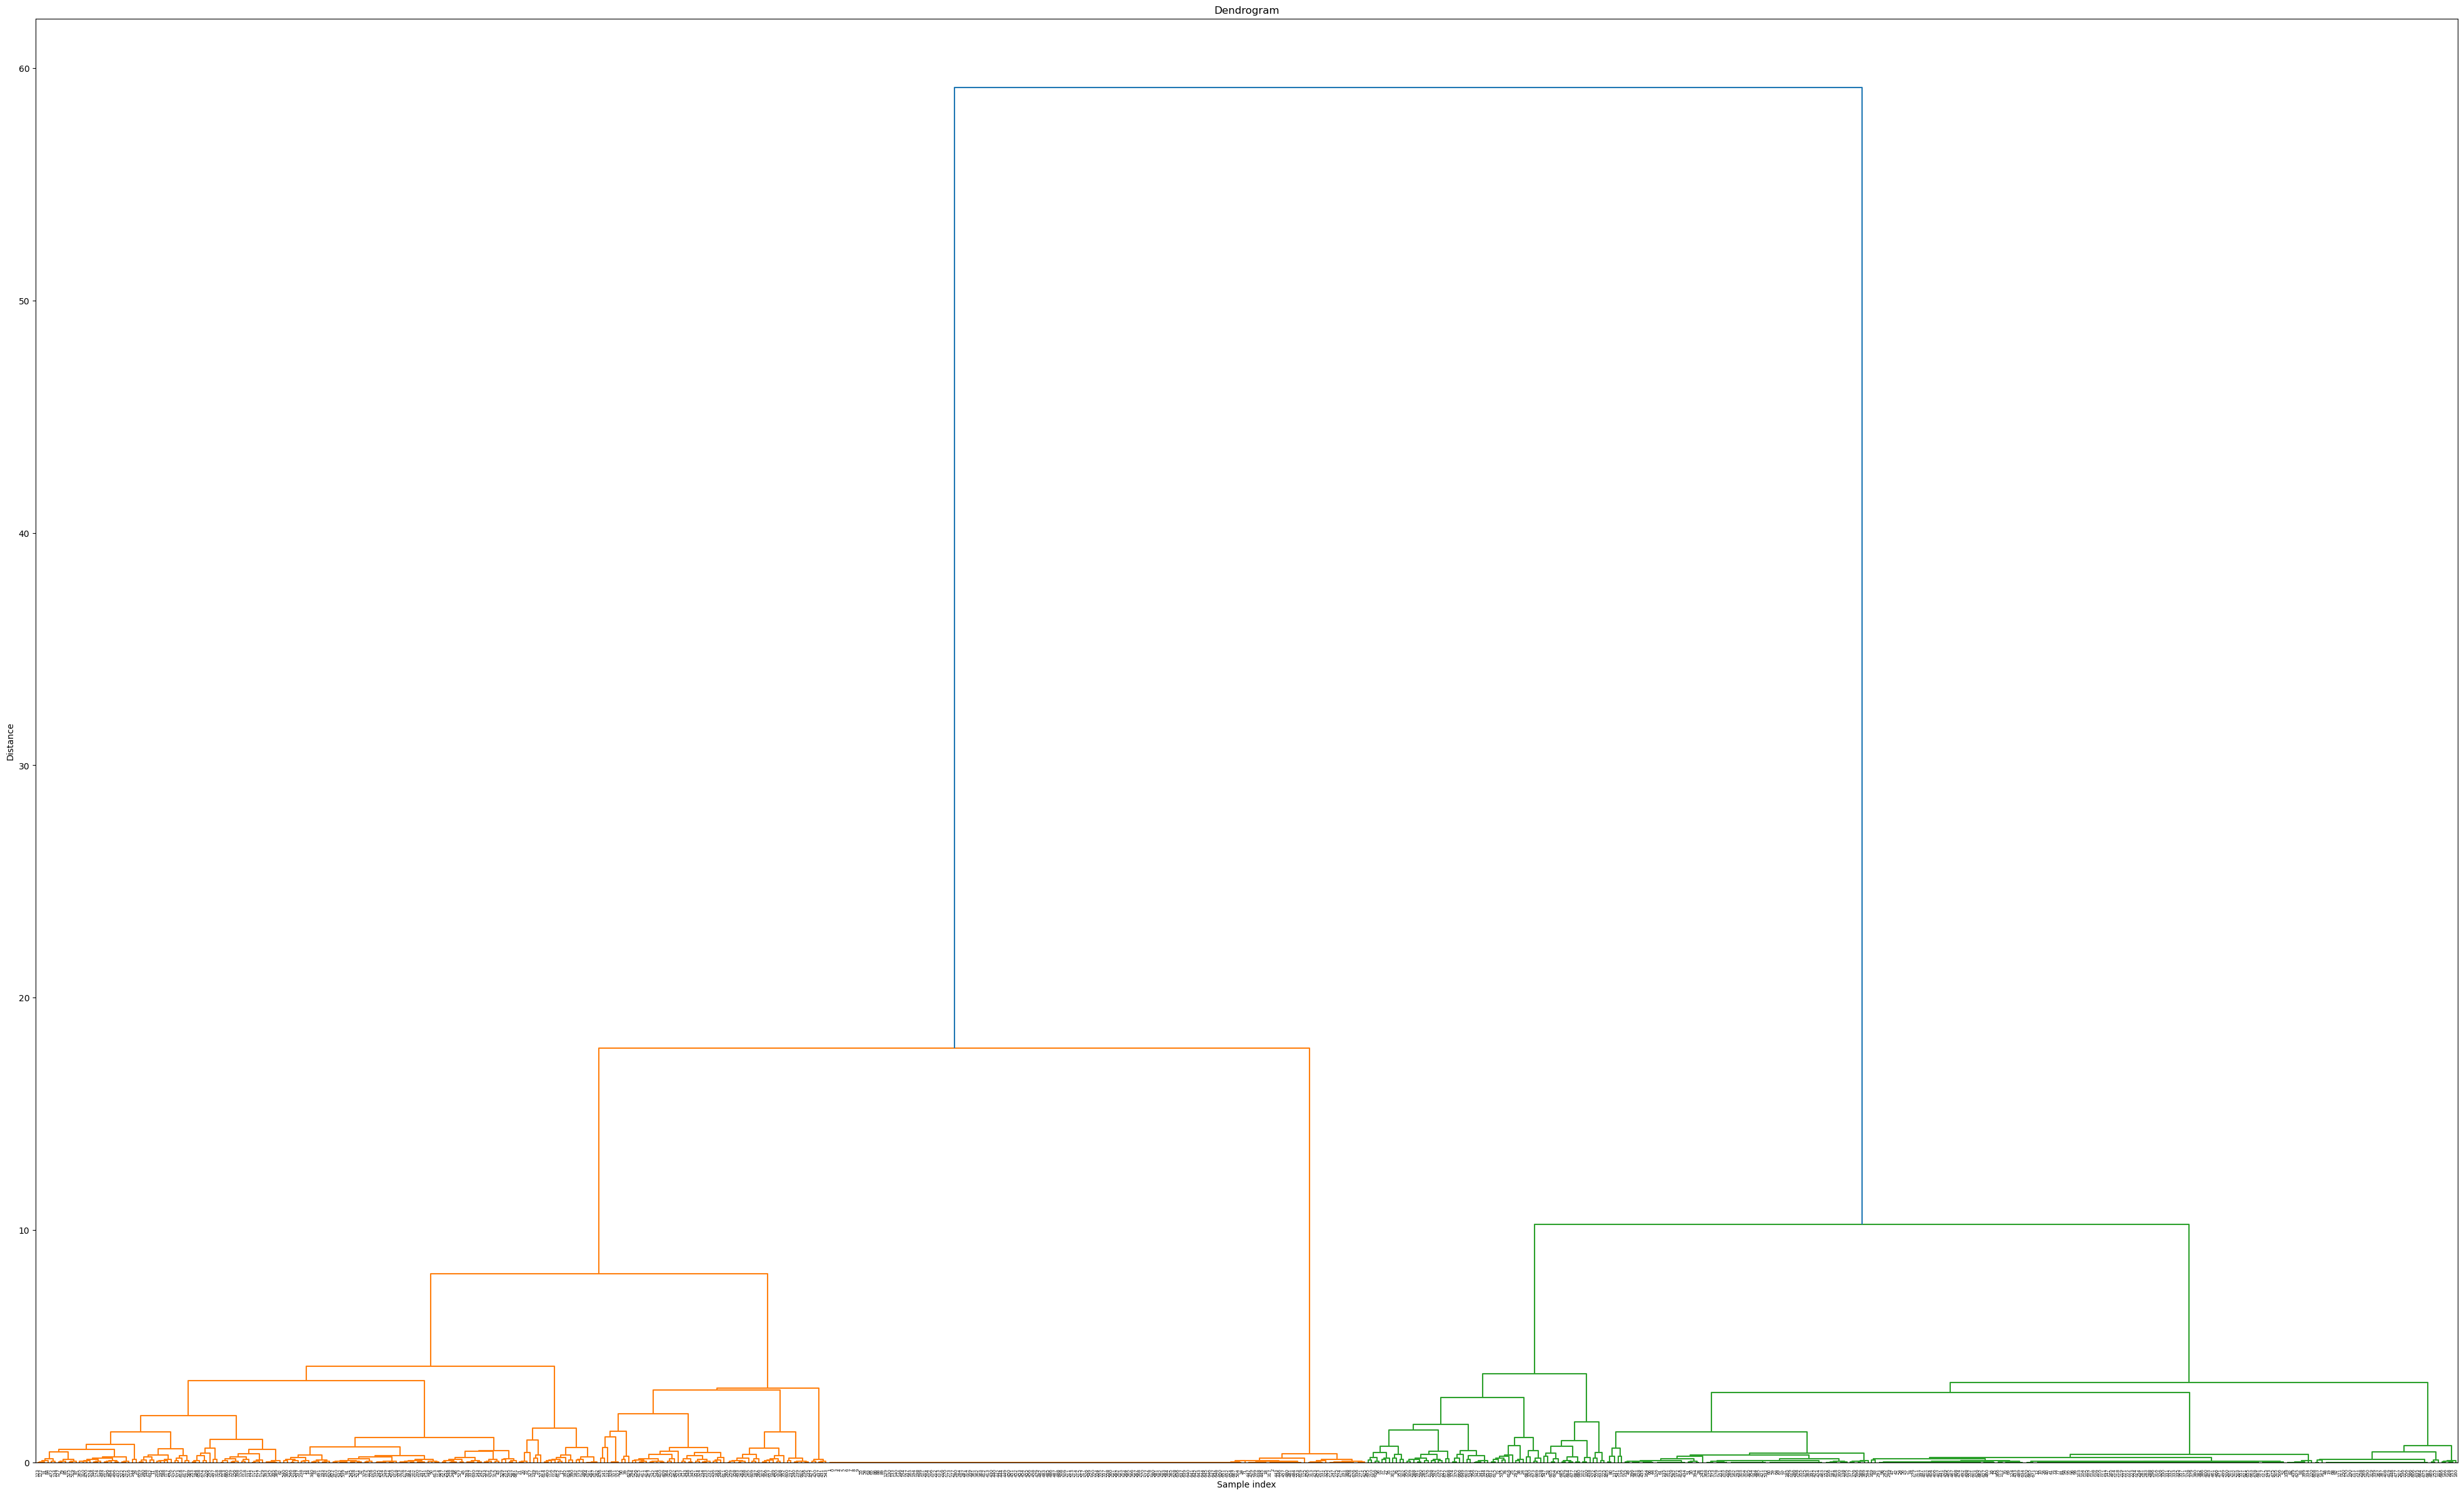

In [80]:
# Compute the dendrogram

X = df_filtered[['R_normalized', 'G_normalized', 'B_normalized']]

# Compute the hierarchical clustering
linked = linkage(X, method='ward')


plt.figure(figsize=(50, 30))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')


plt.xticks(rotation=90)

plt.savefig('Dendrogram.jpg', bbox_inches='tight')


plt.show()


In [69]:
#FORM CLUSTERS

distance_threshold = 10
df_filtered['Cluster'] = fcluster(linked, distance_threshold, criterion='distance')


df_filtered.head()


,Company,Image URL,Dominant Color,Color Class,R,G,B,R_normalized,G_normalized,B_normalized,Cluster
0,Louis Vuitton,https://assets.vogue.com/photos/65e782f4e62118...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,3
1,Louis Vuitton,https://assets.vogue.com/photos/65e782f659e1b4...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,3
2,Louis Vuitton,https://assets.vogue.com/photos/65e782fadbe716...,"(255, 255, 254)",Light Color,255,255,254,1.079083,1.303956,1.400418,3
3,Louis Vuitton,https://assets.vogue.com/photos/65e782f98c5ec4...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,3
4,Louis Vuitton,https://assets.vogue.com/photos/65e782fbe62118...,"(255, 255, 255)",Light Color,255,255,255,1.079083,1.303956,1.410487,3


In [70]:
# Calculate the centroids to normalized 
centroids_normalized = df_filtered.groupby('Cluster')[['R_normalized', 'G_normalized', 'B_normalized']].mean()

# Convert back to the original scale
centroids_original = scaler.inverse_transform(centroids_normalized)


print("\nCluster centroids (normalized scale):")
print(centroids_normalized)

print("\nCluster centroids (original scale):")
print(centroids_original)



Cluster centroids (normalized scale):
         R_normalized  G_normalized  B_normalized
Cluster                                          
1           -1.197213     -1.139369     -1.084678
2           -0.490350     -0.617594     -0.622616
3            1.077845      1.303956      1.401537
4            0.702929      0.525415      0.401754

Cluster centroids (original scale):
[[ 14.66115702   5.87190083   7.18181818]
 [ 89.29411765  59.07352941  53.07352941]
 [254.86928105 255.         254.11111111]
 [215.28444444 175.61777778 154.81333333]]


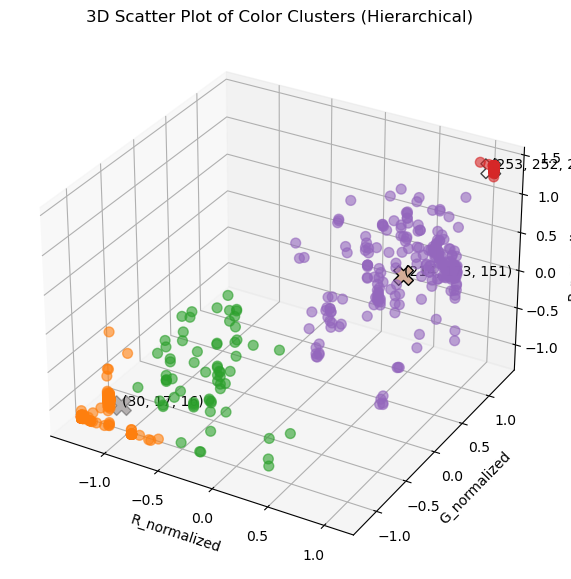

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# VISUALIZATION

cluster_colors = df_filtered['Cluster'].apply(lambda x: f'C{x}')


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
scatter = ax.scatter(df_filtered['R_normalized'], df_filtered['G_normalized'], df_filtered['B_normalized'], 
                     c=cluster_colors, s=50, alpha=0.6, marker='o')


ax.scatter(normalized_centroids[:, 0], normalized_centroids[:, 1], normalized_centroids[:, 2], 
           c=normalized_colors, s=200, marker='X', edgecolor='k')

# Annotate the centroids with their original RGB values
for i, centroid in enumerate(original_centroids):
    label = f"({int(centroid[0])}, {int(centroid[1])}, {int(centroid[2])})"
    ax.text(normalized_centroids[i, 0], normalized_centroids[i, 1], normalized_centroids[i, 2], 
            label, color='black')


ax.set_xlabel('R_normalized')
ax.set_ylabel('G_normalized')
ax.set_zlabel('B_normalized')
ax.set_title('3D Scatter Plot of Color Clusters (Hierarchical)')


plt.savefig('3D_Scatter_plot_of_color_clusters_Hierarchical.jpg')
plt.show()


In [6]:
#calculate the centroids again

In [7]:
# Calculate centroids for each cluster in the original RGB scale
centroids = df_filtered.groupby('Cluster')[['R', 'G', 'B']].mean()

# Print centroids
print("Cluster centroids (original scale):")
print(centroids)


Cluster centroids (original scale):
                  R           G           B
Cluster                                    
1         14.661157    5.871901    7.181818
2         89.294118   59.073529   53.073529
3        254.869281  255.000000  254.111111
4        215.284444  175.617778  154.813333
